# Eksperimendid alalisvooluga

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 20.11.2024</div>
<div style="display:none">
$\renewcommand{\vec}[1]{{\bf #1}}$
$\newcommand{\aver}[1]{\langle #1 \rangle}$
$\newcommand{\eps}{\varepsilon}$
</div>

Selles juhendis kirjeldatakse lihtsate arvutijuhitavate  alalisvoolumõõtmiste realiseerimist Jupyteri keskkonnas, kasutades programmeerimiskeelena Pythonit. Käsitletakse eksperimente, kus pinge ja vool muutuvad võrdlemisi aeglaselt (sekundite diapasoonis või aeglasemalt), nii et hetksignaali mõõtmiseks saab kasutada tavalist (arvutiühendusega) multimeetrit. Lisaks läheb tarvis ka arvutiga juhitavat toiteallikat, mille digitaalset volt- või ampermeetrit saab kasutada täiendava mõõteriistana.

<h1>Sisukord<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Katsevahendid" data-toc-modified-id="Katsevahendid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Katsevahendid</a></span></li><li><span><a href="#Ettevalmistused" data-toc-modified-id="Ettevalmistused-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ettevalmistused</a></span></li><li><span><a href="#Seadmete-programmeerimine" data-toc-modified-id="Seadmete-programmeerimine-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seadmete programmeerimine</a></span><ul class="toc-item"><li><span><a href="#Multimeeter" data-toc-modified-id="Multimeeter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multimeeter</a></span></li><li><span><a href="#Toiteplokk" data-toc-modified-id="Toiteplokk-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Toiteplokk</a></span></li></ul></li><li><span><a href="#Toiteploki-näidikute-täpsus" data-toc-modified-id="Toiteploki-näidikute-täpsus-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Toiteploki näidikute täpsus</a></span></li><li><span><a href="#Hõõglambi-voltamperkarakteristik" data-toc-modified-id="Hõõglambi-voltamperkarakteristik-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hõõglambi voltamperkarakteristik</a></span></li><li><span><a href="#Dioodi-voltamperkarakteristik" data-toc-modified-id="Dioodi-voltamperkarakteristik-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dioodi voltamperkarakteristik</a></span></li><li><span><a href="#Aku-tühjenemine" data-toc-modified-id="Aku-tühjenemine-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aku tühjenemine</a></span></li><li><span><a href="#Kondensaator" data-toc-modified-id="Kondensaator-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Kondensaator</a></span><ul class="toc-item"><li><span><a href="#Laadumine" data-toc-modified-id="Laadumine-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Laadumine</a></span></li><li><span><a href="#Tühjenemine" data-toc-modified-id="Tühjenemine-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Tühjenemine</a></span></li><li><span><a href="#Laengu-sõltuvus-pingest" data-toc-modified-id="Laengu-sõltuvus-pingest-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Laengu sõltuvus pingest</a></span></li><li><span><a href="#Mäluefekt" data-toc-modified-id="Mäluefekt-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Mäluefekt</a></span></li></ul></li></ul></div>

## Katsevahendid

<img src="PiHut.jpg" style="float: right; width: 18em; max-width: 50%;">Seda laadi lihtsamad seadmed ühenduvad arvutiga jadaliidese kaudu (RS232 standard). Kaasaegsetel arvutitel reeglina füüsilist jadaväratit enam ei ole, kuid need saab tekitada vastava USB lisaseadmega. Paljud aparaadid kasutavad virtuaalset jadaväratit, nii et need seadmed ühenduvad arvutiga otse USB kaabliga. Füüsiline RS232 liides ei vaja mingit lisatarkvara, USB-RS232 üleminek vajab siiski draiverit. Jadaväratiga seadmete juhtimine on võrdlemisi lihtne ja seisneb sageli lihtsalt teksti kujul käskude/info saatmisel/vastuvõtmisel. Vastav käsustik/andmete formaat on üldiselt iga seadme jaoks spetsiifiline.

Järgnevates katsetes multimeetriks on UNI-T UT61E. See võtab 2 lugemit sekundis ja maksimaalne näit on 22000. Üle jadavärati edastatavate andmete formaat on kirjeldatud [siin](Cyrustek_ES51922.pdf).

<table>
    <tr>
        <td><img src="UT61E.jpg" style="width: 16em;"></td>
        <td><img src="UT61E_data_cable.jpg" style="width: 6em;"></td>
    </tr>
</table>

Toiteallikaks on KORAD KD3005P (0&ndash;30 V, 0&ndash;5 A). Selle käsustik on kirjeldatud [siin](https://sigrok.org/wiki/Korad_KAxxxxP_series#Protocol) ja [siin](Velleman_PS3005D_Serial_Commands.pdf). On ka teisi mudeleid identse või sarnase funktsionaalsuse ja käsustikuga (nt Velleman PS3005D).

<img src="KD3005P.jpg" style="width: 40em;">

## Ettevalmistused

Pythonis kasutatakse jadapordiga suhtlemiseks teeki [pySerial](https://pypi.org/project/pyserial/). Sõltuvalt kasutatavast Pythoni distributsioonist saab selle installeerida kas paketihalduri `pip` või `conda` abil:

`pip install pyserial`

või

`conda install -c conda-forge pyserial`

Lisaks on vaja vahendeid graafikute tegemiseks (moodul `matplotlib.pyplot`), aja mõõtmist/viivitamist (moodul `time`) ja hilisemas analüüsis ka mudeli sobitamist vähimruutude meetodil (funktsioon `scipy.optimize.curve_fit`).

In [47]:
import numpy as np
from matplotlib.pyplot import *
from serial import *
from serial.tools import list_ports
import time
from scipy.optimize import curve_fit

Lubame interaktiivsed graafikud (lisaks `matplotlib`'ile tuleb installeerida pakett `ipympl`) ja määrame graafikute üldise kujunduse:

In [35]:
%matplotlib ipympl

style.use({
    'figure.figsize': (4, 3),
    'figure.dpi': 120,
    'lines.markersize': 6,
    'lines.markeredgewidth': 1,
    'axes.titlesize': 'medium',
    'savefig.dpi': 200
})

Kuvame loetelu jadaväratitest. Tulemus võiks sarnaneda sellega, mida näitab ka Windowsi kontrollpaneel (Control Panel/Hardware and Sound/Device Manager/Ports).

In [26]:
for p in list(list_ports.comports()):
    print(p)

COM8 - Standard Serial over Bluetooth link (COM8)
COM11 - Standard Serial over Bluetooth link (COM11)
COM12 - Standard Serial over Bluetooth link (COM12)
COM7 - Standard Serial over Bluetooth link (COM7)
COM3 - USB Serial Port (COM3)
COM5 - USB Serial Port (COM5)


Olles identifitseerinud pordid, mille külge aparaadid on ühendatud, jätame need edaspidiseks meelde:

In [9]:
COM_MM = 'COM3' # multimeeter
COM_PS = 'COM5' # toiteallikas

## Seadmete programmeerimine

Mõistlik on iga konkreetse seadme juhtimine kapseldada omaette klassi. Kuna mingil määral on erinevatel seadmetel siiski ühine funktsionaalsus, tasub kasutada ka polümorfismi, st ühine funktsionaalsus realiseerida baasklassis ja sellest tuletada erinevad klassid vastavate konkreetsete seadmete jaoks.

Pythonis klassid defineeritakse võtmesõnaga `class`. Klassi mistahes meetodi defineerimisel esimeseks argumendiks on muutuja, mis viitab antud objektile (klassi eksemplarile), tavaliselt nimega `self`. Objekti liikmetele (nt muutujale `serial`) pääseb siis ligi kujul `self.serial`. Klassi koosseisus on ka mitmed spetsiaalsed meetodid, mille nimi algab ja lõpeb kahe allkriipsuga. Näiteks klassi konstruktor on nimega `__init__`.

Esmalt loome baasklassi mistahes jadaväratiga seadmega suhtlemiseks. Siin ja edaspidi konstruktori ainsaks argumendiks on jadavärati nimi (muutuja `port`). Baasklassi konstruktoris luuakse juba `Serial` objekt, aga selle seadistamine (andmevahetuskiirus, bittide arvud, jne) toimub tuletatud klassides, mis on konkreetsete aparaatidega seotud.

In [5]:
class SerialDevice:
    def __init__(self, port):
        self.serial = Serial()
        self.serial.port = port
    
    def open(self):
        if not self.serial.is_open:
            self.serial.open()
        
    def close(self):
        if self.serial.is_open:
            self.serial.close()
        
    def __enter__(self):
        self.open()
        return self
    
    def __exit__(self, type, value, traceback):
        self.close()

Baasklassi koosseisus on ka meetodid `open` ja `close` kommunikatsiooni alustamiseks ja lõpetamiseks, nii et seadme kasutamise sessioon näeb välja nii:
```python
seade = Seade('COM1'):
seade.open()
# eksperiment
seade.close()
```
Siin `Seade` tähistab klassi, mis on tuletatud baasklassist `SerialDevice`, ning `'COM1'` on konstruktori parameeter.

Seevastu meetodid `__enter__` ja `__exit__` lubavad teha sedasama mõnevõrra mugavamal kujul
```python
with Seade('COM1') as seade:
    # eksperiment
```
kus meetod `open` käivitatakse automaatselt `with`-bloki alguses ja meetod `close` lõpus. Seejuures viimane käivitatakse ka juhul kui `with`-blokis peaks tekkima programmiviga.

Lihtsuse huvides meetod `open` ei tee meil muud kui vaid avab jadapordi. Üldjuhul tuleks pärast pordi avamist ka veenduda, et tegemist on õige seadmega. Aga seda saab muidugi teha vaid tuletatud klassis, mis on teadlik konkreetse seadme protokollist (meetod `open` tuleb siis vastavalt üle defineerida).

### Multimeeter

Meie esimene tuletatud klass `UT61E` loeb multimeetri UNI-T UT61E näidu. Konstruktoris seadistatakse jadavärati andmevahetuse parameetrid. Esmalt tuleb mõistagi välja kutsuda baasklassi konstruktor, mida teeb `super().__init__(...)`.

Multimeeter saadab andmeid pidevalt, umbes kaks lugemit sekundis. Andmepakett on 14 baiti, millest kaks baiti on realõpusümbolid (`\n` ja `\r`, ASCII koodid vastavalt 10 ja 13). Meetod `lugem` kontrollib perioodiliselt, kas sisendpuhvris on uusi andmeid, otsib jooksvalt üles ja interpreteerib esimese tuvastatud 12 baidi pikkuse andmepaketi ning tagastab vastava lugemi.

In [32]:
class UT61E(SerialDevice):
    ANDMED = {
        48: { 48: -3 }, # 10 A
        59: {48: -4, 49: -3, 50: -2, 51: -1, 52: -5}, # voldid
        61: {48: -8, 49: -7}, # auto uA
        63: {48: -6, 49: -5} # auto mA
    }
    
    def __init__(self, port):
        super().__init__(port)
        self.serial.baudrate = 19230
        self.serial.bytesize = SEVENBITS
        self.serial.parity = PARITY_ODD
        self.serial.stopbits = STOPBITS_ONE
        self.serial.rts = False
        self.baidid = []
        self.ootab_reavahetust = True

    def uus(self):
        self.serial.reset_input_buffer()
        self.ootab_reavahetust = True
    
    def lugem(self):
        while True:
            if self.serial.in_waiting > 0:
                for b in self.serial.read_all():
                    if b == 10 or b == 13:
                        if self.ootab_reavahetust:
                            self.ootab_reavahetust = False
                        elif len(self.baidid) > 0:
                            return self.teisenda()
                    elif not self.ootab_reavahetust:
                        self.baidid.append(b)
            time.sleep(0.1)
        
    def teisenda(self):
        baidid = bytes(self.baidid)
        self.baidid.clear()
        
        if len(baidid) != 12:
            raise IOError("UT61E: loeti vale arv baite '%s'" % baidid.decode())

        olek = baidid[7]
        negat = olek & 0x4 == 0x4  # negatiivne väärtus?
        
        if olek & 0x1 == 0x1:  # ületäitumine?
            return float('-inf') if negat else float('inf')

        lugem = int(baidid[1:6])
        if negat:
            lugem = -lugem;

        režiim = baidid[6]
        piirkond = baidid[0]

        if režiim not in UT61E.ANDMED:
            raise IOError("UT61E: tundmatu režiim '%d'" % režiim)
        
        piirkonnad = UT61E.ANDMED[režiim]
        if piirkond not in piirkonnad:
            raise IOError("UT61E: tundmatu tööpiirkond '%d'" % piirkond)
        
        aste = piirkonnad[piirkond]
        return lugem * 10**aste

Minimalistlik kood multimeetri testimiseks:

In [33]:
with UT61E(COM_MM) as mm:
    for i in range(5):
        print('%.4f' % mm.lugem())

-0.8330
6.8050
1.6250
-0.0540
1.3480


### Toiteplokk

Kuna sarnaseid, vaid üksikutes detailides erinevaid toiteplokke on mitmeid, teeme esmalt baasklassi, mis kätkeb ühist funktsionaalsust. Meetodeid `pinge` ja `vool` saab välja kutsuda ühe argumendiga või ilma. Esimesel juhul seatakse vastav toiteploki režiim. Näiteks `pinge(4.5)` seab maksimaalse pinge 4,5 volti. Seejuures tuleks anda seadmele ka 2&ndash;3 sekundit aega uue seisundi stabiliseerimiseks.

Kui meetodid `pinge` ja `vool` kutsuda välja ilma argumentideta, siis tagastatakse vastavalt volt- või ampermeetri näit. Klassi `Serial` parameeter `timeout = 1` annab mõista, et seadmele antakse reageerimiseks aega kuni 1 sekund.

In [27]:
class PSU(SerialDevice):
    def __init__(self, port):
        super().__init__(port)
        self.serial.baudrate = 9600
        self.serial.bytesize = EIGHTBITS
        self.serial.parity = PARITY_NONE
        self.serial.stopbits = STOPBITS_ONE
        self.serial.timeout = 1
        
    def pinge(self, pinge=None):
        if pinge is None:
            self.serial.reset_input_buffer()
            self.serial.write('VOUT1?'.encode())
            baidid = self.serial.read(size=5)
            if len(baidid) < 5:
                raise IOError("UT61E: loeti vähem kui 5 baiti '%s'" % baidid.decode())
            return float(baidid)
        
        self.serial.write(('VSET1:%05.2f' % pinge).encode())
        
    def vool(self, vool=None):
        if vool is None:
            self.serial.reset_input_buffer()
            self.serial.write('IOUT1?'.encode())
            baidid = self.serial.read(size=5)
            if len(baidid) < 5:
                raise IOError("UT61E: loeti vähem kui 5 baiti '%s'" % baidid.decode())
            return float(baidid)
    
        self.serial.write(('ISET1:%05.3f' % vool).encode())

    def toide_peale(self):
        pass  # ei tee midagi, üldjuhul funktsionaalsus puudub
        
    def toide_maha(self):
        pass  # ei tee midagi, üldjuhul funktsionaalsus puudub

Toiteplokil KD3005P on väljund püsivalt aktiivne, aga PS3005D võimaldab seda sisse/välja lülitada, seega viimase jaoks tuleb funktsioonid `toide_peale` ja `toide_maha` üle defineerida:

In [28]:
class KD3005P(PSU):
    pass  # vajalik funktsionaalsus juba baasklassis

class PS3005D(PSU):
    def toide_peale(self):
        self.serial.write('OUT1'.encode())
        
    def toide_maha(self):
        self.serial.write('OUT0'.encode())

Edaspidi kasutame seadet KD3005P ja seega arvutijuhitavat toite lülitamise võimalust ei ole.

Kontrolliks seame pinge ja voolu piirid ning loeme näidikute väärtused:

In [29]:
with KD3005P(COM_PS) as ps:
    ps.pinge(2)
    time.sleep(1)
    ps.vool(0.2)
    time.sleep(1)
    print('%.2f' % ps.pinge())
    print('%.3f' % ps.vool())

2.00
0.000


Kuna ahel oli avatud, siis pinge saavutas seatud maksimumväärtuse ja voolutugevus jäi nulliks.

## Toiteploki näidikute täpsus

Kontrollimaks toiteploki pingenäidiku täpsust, mõõdame pinget toiteploki klemmidel multimeetriga ja võrdleme saadud näite.

In [30]:
U_set = np.arange(0.5, 28, 0.5)
U_ps = []
U_mm = []
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            mm.uus()
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_set = %4.1f, U_ps = %5.2f, U_mm = %7.4f' % (U, U_ps[-1], U_mm[-1]))
        ps.pinge(1)
        
U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_set =  0.5, U_ps =  0.50, U_mm =  0.4982
U_set =  1.0, U_ps =  1.00, U_mm =  0.9964
U_set =  1.5, U_ps =  1.50, U_mm =  1.4988
U_set =  2.0, U_ps =  2.00, U_mm =  1.9997
U_set =  2.5, U_ps =  2.50, U_mm =  2.4940
U_set =  3.0, U_ps =  3.00, U_mm =  2.9990
U_set =  3.5, U_ps =  3.50, U_mm =  3.4930
U_set =  4.0, U_ps =  4.00, U_mm =  3.9990
U_set =  4.5, U_ps =  4.50, U_mm =  4.4920
U_set =  5.0, U_ps =  5.00, U_mm =  4.9910
U_set =  5.5, U_ps =  5.50, U_mm =  5.4930
U_set =  6.0, U_ps =  6.00, U_mm =  5.9960
U_set =  6.5, U_ps =  6.50, U_mm =  6.4900
U_set =  7.0, U_ps =  7.00, U_mm =  6.9890
U_set =  7.5, U_ps =  7.50, U_mm =  7.4920
U_set =  8.0, U_ps =  8.00, U_mm =  7.9940
U_set =  8.5, U_ps =  8.50, U_mm =  8.4940
U_set =  9.0, U_ps =  9.00, U_mm =  8.9930
U_set =  9.5, U_ps =  9.50, U_mm =  9.4940
U_set = 10.0, U_ps = 10.00, U_mm =  9.9880
U_set = 10.5, U_ps = 10.50, U_mm = 10.4890
U_set = 11.0, U_ps = 11.00, U_mm = 10.9920
U_set = 11.5, U_ps = 11.50, U_mm = 11.4890
U_set = 12.

In [31]:
ΔU = np.sqrt(np.mean(np.square(U_ps - U_mm)))
print('ruutkeskmine erinevus = %.3f V' % ΔU)

ruutkeskmine erinevus = 0.011 V


Analoogiliselt võrdleme ampermeetrite näite:

In [96]:
I_set = np.arange(0.01, 0.22, 0.01)
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        I_ps = []
        I_mm = []
        for I in I_set:
            ps.vool(I)
            time.sleep(3)
            mm.uus()
            I_mm.append(mm.lugem())
            I_ps.append(ps.vool())
            print('I_set = %.2f, I_ps = %.3f, I_mm = %.5f' % (I, I_ps[-1], I_mm[-1]))
        ps.vool(0.01)
        
I_ps = np.array(I_ps)
I_mm = np.array(I_mm)

I_set = 0.01, I_ps = 0.009, I_mm = 0.01192
I_set = 0.02, I_ps = 0.019, I_mm = 0.02076
I_set = 0.03, I_ps = 0.028, I_mm = 0.03119
I_set = 0.04, I_ps = 0.039, I_mm = 0.04152
I_set = 0.05, I_ps = 0.049, I_mm = 0.05175
I_set = 0.06, I_ps = 0.058, I_mm = 0.06209
I_set = 0.07, I_ps = 0.070, I_mm = 0.07225
I_set = 0.08, I_ps = 0.079, I_mm = 0.08228
I_set = 0.09, I_ps = 0.089, I_mm = 0.09113
I_set = 0.10, I_ps = 0.100, I_mm = 0.10288
I_set = 0.11, I_ps = 0.109, I_mm = 0.11168
I_set = 0.12, I_ps = 0.119, I_mm = 0.12175
I_set = 0.13, I_ps = 0.129, I_mm = 0.13209
I_set = 0.14, I_ps = 0.140, I_mm = 0.14226
I_set = 0.15, I_ps = 0.149, I_mm = 0.15261
I_set = 0.16, I_ps = 0.160, I_mm = 0.16284
I_set = 0.17, I_ps = 0.170, I_mm = 0.17289
I_set = 0.18, I_ps = 0.178, I_mm = 0.18169
I_set = 0.19, I_ps = 0.191, I_mm = 0.19345
I_set = 0.20, I_ps = 0.199, I_mm = 0.20230
I_set = 0.21, I_ps = 0.210, I_mm = 0.21247


In [60]:
ΔI = np.sqrt(np.mean(np.square(I_ps - I_mm)))
print('ruutkeskmine erinevus = %.4f A' % ΔI)

ruutkeskmine erinevus = 0.0029 A


Milliamprite piirkonnas mõõtes jääb täpsusest 3 mA siiski väheks, seetõttu järgnevas kasutame sekundaarse mõõteriistana vaid toiteploki voltmeetrit. Sel juhul voolutugevuse mõõtmiseks tuleb lihtsalt ahelasse lisada järjestikku paraja suurusega takisti ja mõõta multimeetriga sellel tekkivat pingelangu.

## Mõõtmise visualiseerimine

Kuigi edaspidi mõõtmistulemused lihtsalt trükitakse ekraanile ja (staatilisi) graafikuid kasutatakse vaid juba mõõdetud andmete analüüsimiseks, ei ole raske ka mõõtmistulemusi jooksvalt visualiseerida. Selleks tuleb joonis teha interaktiivne, nii et graafikut oleks võimalik mõõtmise ajal pidevalt uuendada. Esmalt teeme vajaliku kujundusega tühja joonise (siin on küll juba näha punane graafikujoon,  aga see tekib alles pärast järgmise lahtri käivitamist):

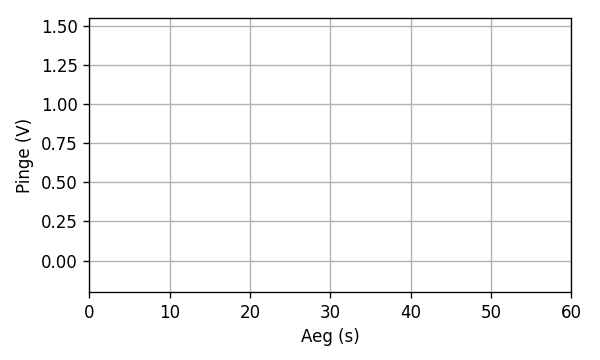

In [45]:
fig = figure('test', clear=True, figsize=(5,3))
fig.canvas.header_visible = False
graafik, = plot((), (), 'r-')
xlim(0, 60)
ylim(-0.2, 1.55)
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
show()

Nüüd mõõdame ja visualiseerime pinge muutumist 60 s jooksul (testrijuhtmed ühendati pooltühja 1,5 V leeliselemendiga):

In [46]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    mm.uus()
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        aeg.append(time.time() - t0)
        pinge.append(lugem)
        graafik.set_data( aeg, pinge )
        fig.canvas.draw()
        fig.canvas.flush_events()
        if aeg[-1] > 60:
            break

## Hõõglambi voltamperkarakteristik

<img src="lambi_voltamper_skeem.png" style="height: 8em; float: right;"/>Koostame joonisel kujutatud elektriskeemi. Hõõglamp on ühendatud järjestikku paraja suurusega takistiga. Multimeetriga mõõdetakse takistil tekkivat pingelangu ja selle järgi voolutugevust ahelas. Toiteploki väljundpinge ja takisti pingelangu vahe kaudu saame teada ka pinge lambil.

Alternatiivselt võiks multimeetriga mõõta pinget lambil. Optimaalne variant sõltub komponentide valikust. Ideaalis võiks mõlemad mõõteriistad töötada üle kogu oma mõõtepiirkonna, ning voltmeetrite näidud peaksid olema oluliselt erinevad, et kahe pingenäidu lahutamisel ei tekiks suurt suhtelist viga.

In [5]:
U_set = np.arange(0.5, 15.1, 0.5)
U_ps = []
U_mm = []
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            mm.uus()
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_ps = %5.2f, U_mm = %.4f' % (U_ps[-1], U_mm[-1]))
        ps.pinge(1)

U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_ps =  0.50, U_mm = 0.2792
U_ps =  1.00, U_mm = 0.4784
U_ps =  1.50, U_mm = 0.6116
U_ps =  2.00, U_mm = 0.7271
U_ps =  2.50, U_mm = 0.8395
U_ps =  3.00, U_mm = 0.9474
U_ps =  3.50, U_mm = 1.0470
U_ps =  4.00, U_mm = 1.1429
U_ps =  4.50, U_mm = 1.2334
U_ps =  5.00, U_mm = 1.3220
U_ps =  5.50, U_mm = 1.4084
U_ps =  6.00, U_mm = 1.4913
U_ps =  6.50, U_mm = 1.5694
U_ps =  7.00, U_mm = 1.6468
U_ps =  7.50, U_mm = 1.7225
U_ps =  8.00, U_mm = 1.7956
U_ps =  8.50, U_mm = 1.8670
U_ps =  9.00, U_mm = 1.9366
U_ps =  9.50, U_mm = 2.0050
U_ps = 10.00, U_mm = 2.0708
U_ps = 10.50, U_mm = 2.1361
U_ps = 11.00, U_mm = 2.2004
U_ps = 11.50, U_mm = 2.2620
U_ps = 12.00, U_mm = 2.3230
U_ps = 12.50, U_mm = 2.3830
U_ps = 13.00, U_mm = 2.4420
U_ps = 13.50, U_mm = 2.4990
U_ps = 14.00, U_mm = 2.5550
U_ps = 14.50, U_mm = 2.6040
U_ps = 15.00, U_mm = 2.6620


Teostame esmased arvutused ja graafikud. Alati salvestame vähemalt otsesed mõõtmistulemused, et neid saaks edaspidi failist laadida ja analüüsida ilma katset kordamata.

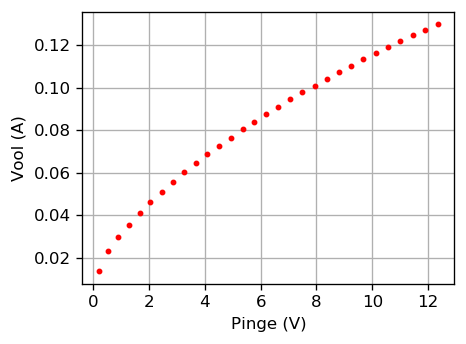

In [10]:
fail = 'lambi_voltamper'
takistus = 20.5
U_lamp = U_ps - U_mm
I_lamp = U_mm / takistus
np.savetxt(fail + '.txt', np.column_stack((U_ps, U_mm, U_lamp, I_lamp)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(U_lamp, I_lamp, 'r.')
    xlabel('Pinge (V)')
    ylabel('Vool (A)')
    grid()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

Edasiseks analüüsiks võime kasutada äsja mõõdetud andmeid (kui need on veel arvuti mälus) või vajadusel taastame need failist:

In [72]:
U_ps, U_mm, U_lamp, I_lamp = np.loadtxt('lambi_voltamper.txt').T

Lihtsaim hõõglambi mudel ennustab pinge ja voolu vahel astmeseost: $I=aU^b$.

a = 0.031, b = 0.573


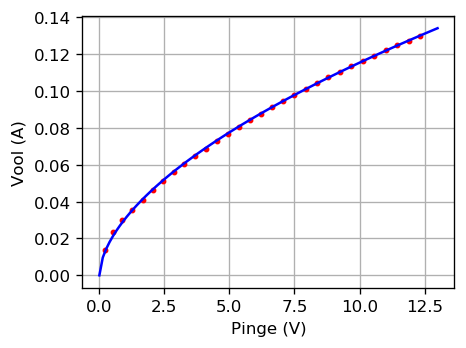

In [9]:
mudel = lambda U, a, b: a*U**b

a, b = 0.1, 0.5
(a, b), _ = curve_fit(mudel, U_lamp, I_lamp, (a, b))
print('a = %.3f, b = %.3f' % (a, b))

U = np.linspace(0, 13, 100)
with ioff():
    fig = figure()
    plot(U_lamp, I_lamp, 'r.')
    plot(U, mudel(U, a, b), 'b-')
    xlabel('Pinge (V)')
    ylabel('Vool (A)')
    grid()
    savefig(fail + '_mudel.png', bbox_inches='tight')
    display(fig)

## Dioodi voltamperkarakteristik

<img src="dioodi_voltamper_skeem.png" style="height: 8em; float: right;"/>Seekord on mõistlik multimeetriga mõõta pinget dioodil, kuna pärast dioodi avanemist dioodi pinge muutub võrdlemisi aeglaselt.

In [13]:
U_set = np.geomspace(0.25, 7.1, 25)

U_ps = []
U_mm = []
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            mm.uus()
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_ps = %.2f, U_mm = %.4f' % (U_ps[-1], U_mm[-1]))
        ps.pinge(1)

U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_ps = 0.25, U_mm = 0.2524
U_ps = 0.29, U_mm = 0.2867
U_ps = 0.33, U_mm = 0.3275
U_ps = 0.38, U_mm = 0.3830
U_ps = 0.44, U_mm = 0.4382
U_ps = 0.50, U_mm = 0.4898
U_ps = 0.58, U_mm = 0.5507
U_ps = 0.66, U_mm = 0.5907
U_ps = 0.76, U_mm = 0.6222
U_ps = 0.88, U_mm = 0.6467
U_ps = 1.01, U_mm = 0.6637
U_ps = 1.16, U_mm = 0.6789
U_ps = 1.33, U_mm = 0.6909
U_ps = 1.53, U_mm = 0.7019
U_ps = 1.76, U_mm = 0.7119
U_ps = 2.02, U_mm = 0.7208
U_ps = 2.33, U_mm = 0.7296
U_ps = 2.68, U_mm = 0.7374
U_ps = 3.08, U_mm = 0.7448
U_ps = 3.54, U_mm = 0.7519
U_ps = 4.06, U_mm = 0.7587
U_ps = 4.67, U_mm = 0.7656
U_ps = 5.37, U_mm = 0.7720
U_ps = 6.18, U_mm = 0.7784
U_ps = 7.10, U_mm = 0.7847


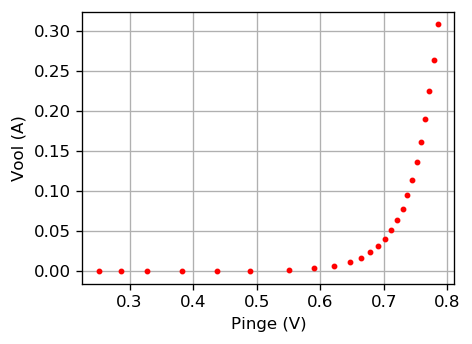

In [14]:
fail = 'dioodi_voltamper'
takistus = 20.5
U_diood = U_mm
I_diood = (U_ps - U_mm) / takistus
np.savetxt(fail + '.txt', np.column_stack((U_ps, U_diood, I_diood)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(U_diood, I_diood, 'r.')
    xlabel('Pinge (V)')
    ylabel('Vool (A)')
    grid()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

Shockley dioodi mudel ennustab $$I=I_\text{s}\left[\exp\left(\frac{U}{nU_T}\right)-1\right],$$ kus $I_s$ on küllastav vool vastupingestatud dioodis, $U_T=k_\text{B}T/q$ (toatemperatuuril 25,4 mV) ja $n$ iseloomustab dioodi ideaalsust.

I_s = 1.14e-09 A, n = 1.59


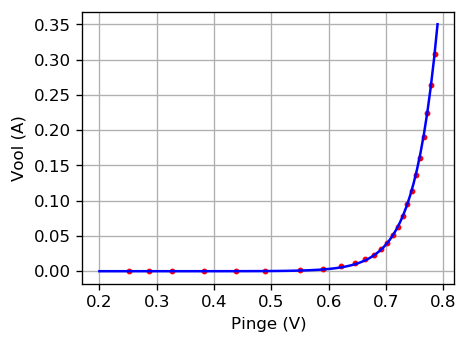

In [18]:
U_T = 0.025421
mudel = lambda U, I_s, n: I_s * (np.exp(U/(n * U_T)) - 1)
I_s, n = 1e-14, 1

(I_s, n), _ = curve_fit(mudel, U_diood, I_diood, (I_s, n))
print('I_s = %.3g A, n = %.2f' % (I_s, n))

U = np.linspace(0.2, 0.79, 100)
with ioff():
    fig = figure()
    plot(U_diood, I_diood, 'r.')
    plot(U, mudel(U, I_s, n), 'b-')
    xlabel('Pinge (V)')
    ylabel('Vool (A)')
    grid()
    savefig(fail + '_mudel.png', bbox_inches='tight')
    display(fig)

## Aku tühjenemine

<img src="aku_tühjenemine_skeem.png" style="height: 9em; float: right; margin_left: 1em;"/>Tühjendame täis laetud NiMH-aku üle mõistliku suurusega takisti, jälgides aku pinge muutumist multimeetriga. Teades takistust, saame ühtlasi teada voolutugevuse ja selle kaudu elektrilaengu. Seega selles katses on vaja vaid multimeetrit.

In [ ]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    time.sleep(2)
    t0 = time.time()
    while True:
        aeg.append(time.time() - t0)
        mm.uus()
        pinge.append(mm.lugem())
        print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
        if (pinge[-1] < 0.5):
            break
        time.sleep(5)

aeg = np.array(aeg)
pinge = np.array(pinge)

Siin vaid väike väljavõte tekkivast andmetabelist:
```
aeg =    0.0 s;  pinge = 1.3014 V
aeg =    5.0 s;  pinge = 1.3009 V
aeg =   10.0 s;  pinge = 1.3004 V
aeg =   15.0 s;  pinge = 1.2999 V
aeg =   20.0 s;  pinge = 1.2996 V
aeg =   25.0 s;  pinge = 1.2992 V
aeg =   30.0 s;  pinge = 1.2988 V
aeg =   35.0 s;  pinge = 1.2985 V
aeg =   40.0 s;  pinge = 1.2982 V
aeg =   45.0 s;  pinge = 1.2979 V
aeg =   50.0 s;  pinge = 1.2976 V
aeg =   55.0 s;  pinge = 1.2973 V
aeg =   60.0 s;  pinge = 1.2970 V
...
aeg = 21178.6 s;  pinge = 0.5631 V
aeg = 21183.6 s;  pinge = 0.5560 V
aeg = 21188.6 s;  pinge = 0.5492 V
aeg = 21193.6 s;  pinge = 0.5428 V
aeg = 21198.6 s;  pinge = 0.5366 V
aeg = 21203.6 s;  pinge = 0.5307 V
aeg = 21208.6 s;  pinge = 0.5251 V
aeg = 21213.6 s;  pinge = 0.5198 V
aeg = 21218.6 s;  pinge = 0.5146 V
aeg = 21223.6 s;  pinge = 0.5096 V
aeg = 21228.6 s;  pinge = 0.5049 V
aeg = 21233.6 s;  pinge = 0.5003 V
aeg = 21238.6 s;  pinge = 0.4959 V
```

Teades aega ja voolutugevust, saame ülekantud elektrilaengu leida integreerimise teel (näiteks trapetsmeetodiga).

Mahtuvus 982 mAh


<IPython.core.display.Javascript object>


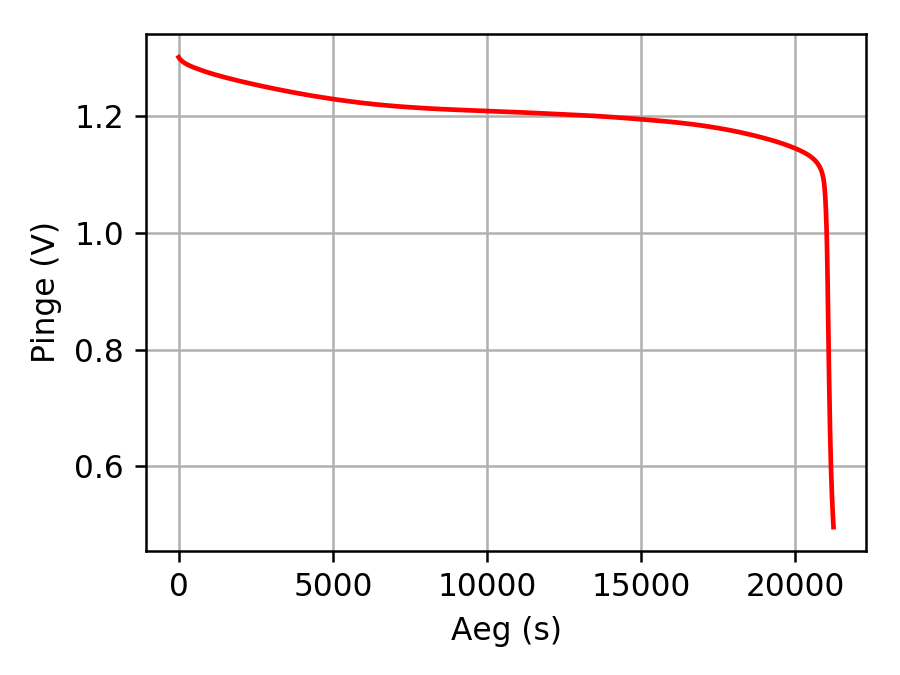

In [175]:
fail = 'aku_tühjenemine'
takistus = 7.23
vool = pinge / takistus
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge, vool)), fmt='%.8f')

print('Mahtuvus %.3g mAh' % (np.trapz(vool, aeg) * (1000 / 3600)))

with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    grid()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

## Kondensaator

### Laadumine

<img src="kondensaatori_laadumine_skeem.png" style="height: 9em; float: right; margin_left: 1em;"/>Kondensaatori laadumise uurimiseks koostame joonisel kujutatud elektriskeemi. Eelnevalt veendume, et kondensaator on tühjaks laetud. Toiteplokile on seatud kindla suurusega pinge (ja seda ei ole tarvis arvutist juhtida). Käivitame mõõtmise ja mõne hetke pärast sulgeme lüliti.

Nendes katsetes kasutame superkondensaatorit nimimahtuvusega $C=$&nbsp;1,5&nbsp;F, nii et isegi võrdlemisi väikese takistuse $R$ puhul on ajakonstant $RC$ minutite diapasoonis ja seega pinge muutused kergesti jälgitavad.

In [ ]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    mm.uus()
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        aeg.append(time.time() - t0)
        pinge.append(lugem)
        print('aeg = %6.1f s;  pinge = %6.3f V' % (aeg[-1], pinge[-1]))
        if aeg[-1] > 4000:
            break

aeg = np.array(aeg)
pinge = np.array(pinge)

Jällegi väike väljavõte genereeritud andmetest:
```
aeg =    0.1 s;  pinge =  0.000 V
aeg =    0.6 s;  pinge =  0.000 V
aeg =    1.1 s;  pinge =  0.000 V
aeg =    1.6 s;  pinge =  0.000 V
aeg =    2.1 s;  pinge =  0.000 V
aeg =    2.6 s;  pinge =  0.000 V
aeg =    3.1 s;  pinge =  0.000 V
aeg =    3.6 s;  pinge =  0.000 V
aeg =    4.1 s;  pinge =  0.000 V
aeg =    4.6 s;  pinge =  0.000 V
aeg =    5.2 s;  pinge =  0.000 V
aeg =    5.7 s;  pinge =  0.000 V
aeg =    6.2 s;  pinge =  0.000 V
aeg =    6.7 s;  pinge =  0.000 V
aeg =    7.2 s;  pinge =  0.000 V
...
aeg = 3992.7 s;  pinge =  9.614 V
aeg = 3993.2 s;  pinge =  9.614 V
aeg = 3993.7 s;  pinge =  9.615 V
aeg = 3994.3 s;  pinge =  9.615 V
aeg = 3994.7 s;  pinge =  9.615 V
aeg = 3995.2 s;  pinge =  9.615 V
aeg = 3995.7 s;  pinge =  9.615 V
aeg = 3996.2 s;  pinge =  9.615 V
aeg = 3996.7 s;  pinge =  9.615 V
aeg = 3997.2 s;  pinge =  9.615 V
aeg = 3997.7 s;  pinge =  9.615 V
aeg = 3998.2 s;  pinge =  9.615 V
aeg = 3998.7 s;  pinge =  9.616 V
aeg = 3999.2 s;  pinge =  9.616 V
aeg = 3999.7 s;  pinge =  9.615 V
aeg = 4000.2 s;  pinge =  9.615 V
```

<IPython.core.display.Javascript object>


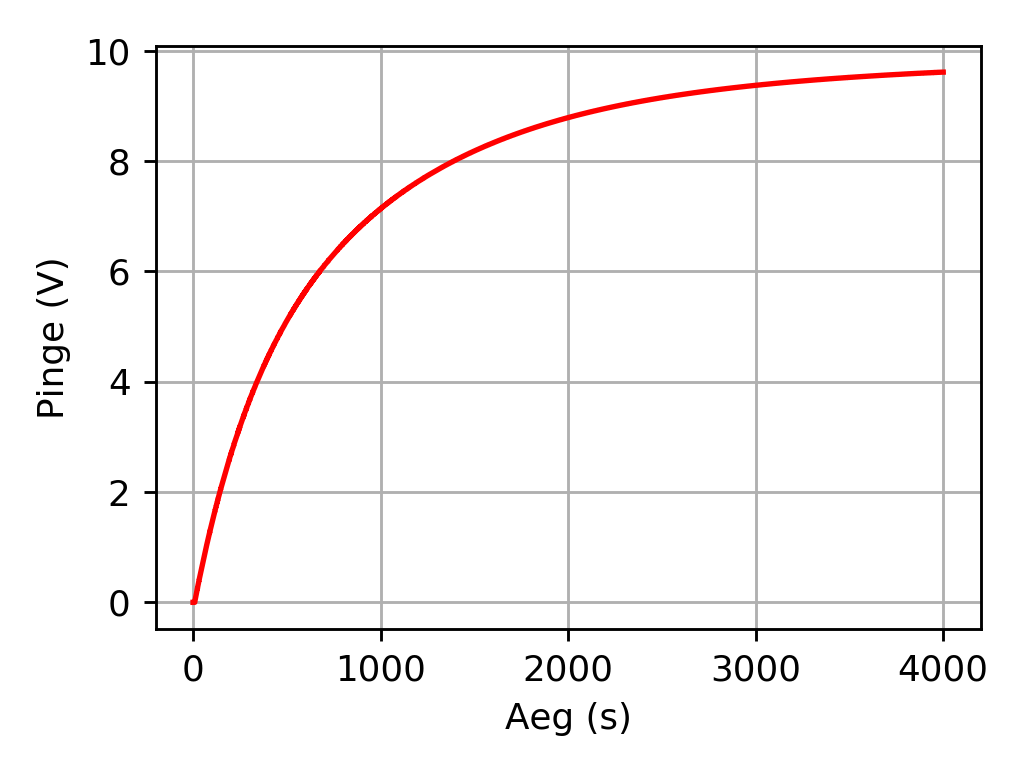

In [41]:
fail = 'kondensaatori_laadumine'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    grid()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

In [82]:
aeg, pinge = np.loadtxt('kondensaatori_laadumine.txt').T

Kui saadud graafikut suumida, on näha, et alguses mõned hetked (enne lüliti L<sub>2</sub> sulgemist) on pinge null. Eemaldame need andmepunktid ja nihutame vastavalt ajatelge. Ühtlasi arvutame voolutugevuse.

In [83]:
toitepinge = 9.994
takistus = 506.7

laadub = aeg > 9.1

aeg = aeg[laadub]
aeg -= aeg[0]
pinge = pinge[laadub]
vool = (toitepinge - pinge) / takistus

Kui kondensaatorit mahtuvusega $C$ laaditakse konstantse pingega $U_0$ üle takisti $R$, siis kondensaatori pinge kasvab ajas järgmiselt: $$U(t)=U_0\left[1-\exp\left(-\frac{t}{CR}\right)\right].$$ Teiste sõnadega, voolutugevus kahaneb eksponentsiaalselt: $$I(t)=\frac{U_0-U(t)}{R}=I_0\exp\left(-\frac{t}{CR}\right).$$ See mudel põhineb eeldusel, et kondensaatori laeng on võrdeline pingega, $Q=CU$ (st mahtuvus $C$ on konstantne), ja kondensaatoril endal mingit täiendavat relaksatsiooniaega ei ole. Selgub, et superkondensaatori (ja ka mõnede elektrolüütkondensaatorite) korral need eeldused ei pea paika, sest ioonide difundeerumine ja laengu relakseerumine poorsetel elektroodidel on võrdlemisi keerulised ja aeglased protsessid.

Seega voolutugevuse käik logaritmilisel graafikul ei tule päris sirge:

<IPython.core.display.Javascript object>


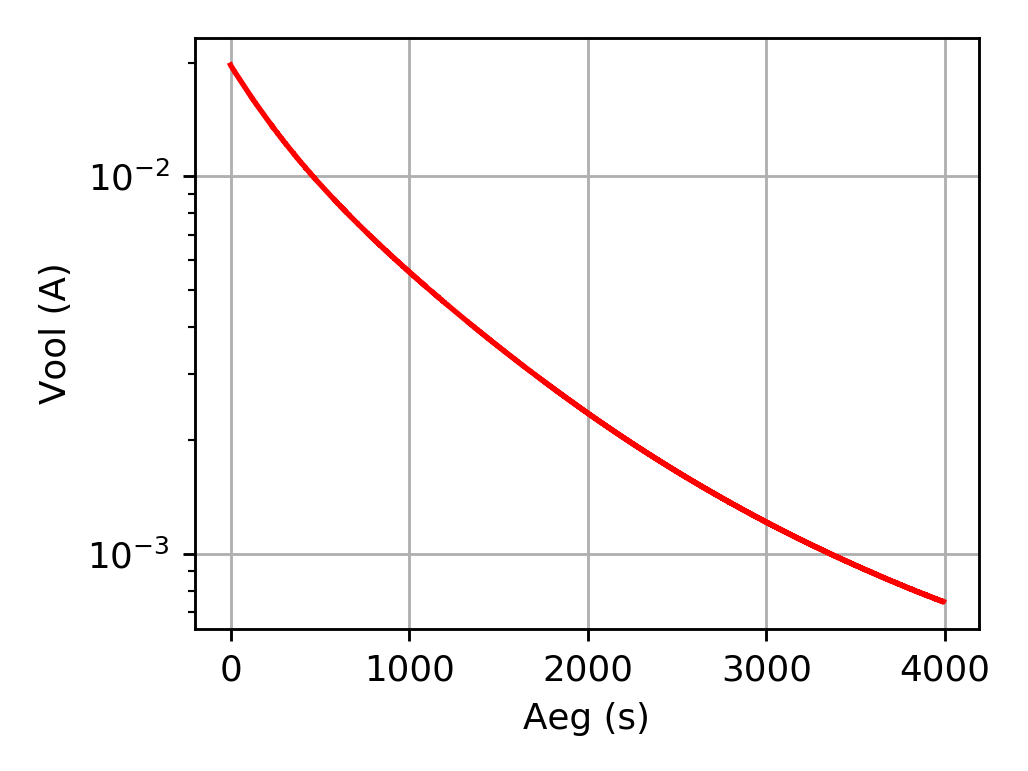

In [84]:
with ioff():
    fig = figure()
    plot(aeg, vool, 'r-')
    yscale('log')
    xlabel('Aeg (s)')
    ylabel('Vool (A)')
    grid()
    tight_layout()
    savefig(fail + '_vool.png', bbox_inches='tight')
    display(fig)

Kui saadud sõltuvuse algusosa lähendada sirgele, saame vastavas lähenduses siiski mahtuvust hinnata:

Algmahtuvus 1.186 F


<IPython.core.display.Javascript object>


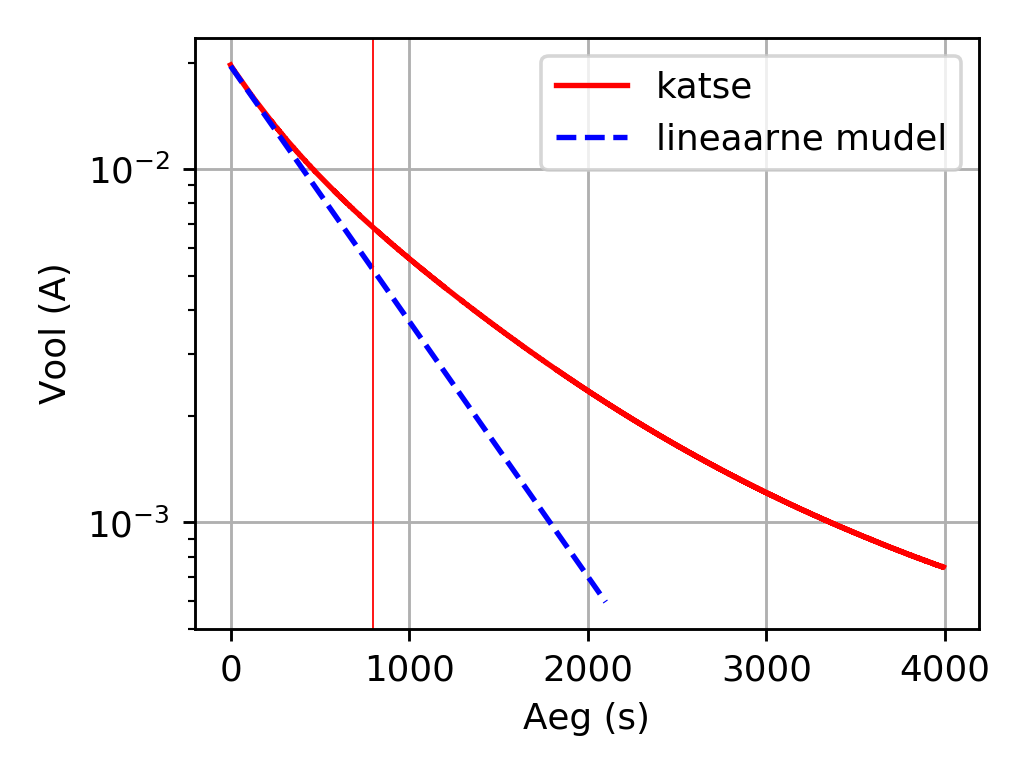

In [85]:
n = len(aeg) // 5  # esimene viiendik andmepunktidest

# lähendame parabooliga, aga kasutame vaid selle algtõusu
_, tõus, algordinaat = np.polyfit(aeg[:n], np.log(vool[:n]), 2)
mahtuvus = -1 / (takistus * tõus)

print('Mahtuvus %.3f F' % mahtuvus)

t = np.linspace(0, 2100, 100)
with ioff():
    fig = figure()
    plot(aeg, vool, 'r-', label='katse')
    plot(t, np.exp(tõus * t + algordinaat), 'b--', label='lineaarne mudel')
    yscale('log')
    xlabel('Aeg (s)')
    ylabel('Vool (A)')
    axvline(aeg[n], color='red', lw=0.5)
    grid()
    legend()
    tight_layout()
    savefig(fail + '_mudel.png', bbox_inches='tight')
    display(fig)

### Tühjenemine

<img src="kondensaatori_tühjenemine_skeem.png" style="height: 9em; float: right; margin-left: 1em;"/>Seame toiteallikale mõistliku suurusega pinge ja voolu ning laadime sellega kondensaatori. Seejärel asetame kondensaatori näidatud elektriskeemi, käivitame mõõtmise ning mõne hetke pärast sulgeme lüliti.

In [ ]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    mm.uus()
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        aeg.append(time.time() - t0)
        pinge.append(lugem)
        print('aeg = %6.1f s;  pinge = %6.3f V' % (aeg[-1], pinge[-1]))
        if aeg[-1] > 6000:
            break

aeg = np.array(aeg)
pinge = np.array(pinge)

```
aeg =    0.3 s;  pinge =  9.993 V
aeg =    0.9 s;  pinge =  9.993 V
aeg =    1.3 s;  pinge =  9.993 V
aeg =    1.8 s;  pinge =  9.993 V
aeg =    2.4 s;  pinge =  9.993 V
aeg =    2.9 s;  pinge =  9.993 V
aeg =    3.3 s;  pinge =  9.993 V
aeg =    3.9 s;  pinge =  9.993 V
aeg =    4.4 s;  pinge =  9.993 V
aeg =    4.8 s;  pinge =  9.993 V
aeg =    5.4 s;  pinge =  9.993 V
aeg =    5.9 s;  pinge =  9.993 V
aeg =    6.3 s;  pinge =  9.993 V
aeg =    6.9 s;  pinge =  9.993 V
aeg =    7.3 s;  pinge =  9.993 V
...
aeg = 5993.2 s;  pinge =  0.074 V
aeg = 5993.8 s;  pinge =  0.074 V
aeg = 5994.2 s;  pinge =  0.074 V
aeg = 5994.7 s;  pinge =  0.074 V
aeg = 5995.3 s;  pinge =  0.074 V
aeg = 5995.7 s;  pinge =  0.074 V
aeg = 5996.3 s;  pinge =  0.074 V
aeg = 5996.7 s;  pinge =  0.074 V
aeg = 5997.2 s;  pinge =  0.074 V
aeg = 5997.8 s;  pinge =  0.074 V
aeg = 5998.2 s;  pinge =  0.074 V
aeg = 5998.7 s;  pinge =  0.074 V
aeg = 5999.3 s;  pinge =  0.074 V
aeg = 5999.7 s;  pinge =  0.074 V
aeg = 6000.2 s;  pinge =  0.074 V
```

<IPython.core.display.Javascript object>


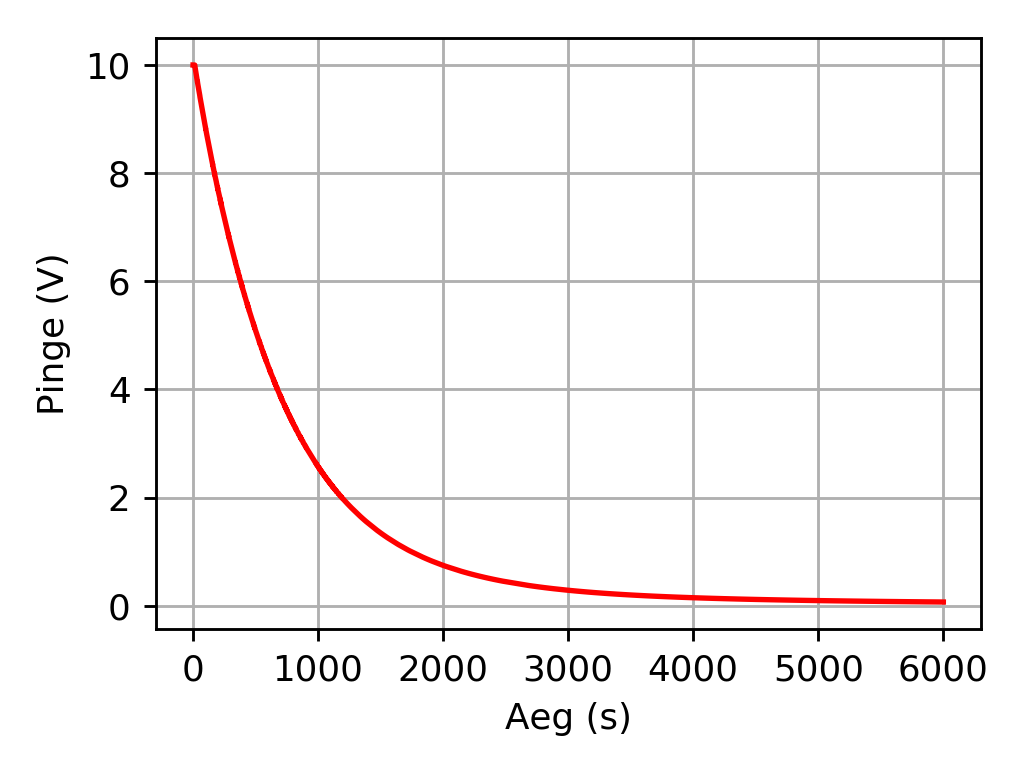

In [74]:
fail = 'kondensaatori_tühjenemine'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    grid()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

In [75]:
tühjeneb = aeg > 13.7

aeg = aeg[tühjeneb]
aeg -= aeg[0]
pinge = pinge[tühjeneb]
vool = pinge / takistus

Algmahtuvus 1.395 F


<IPython.core.display.Javascript object>


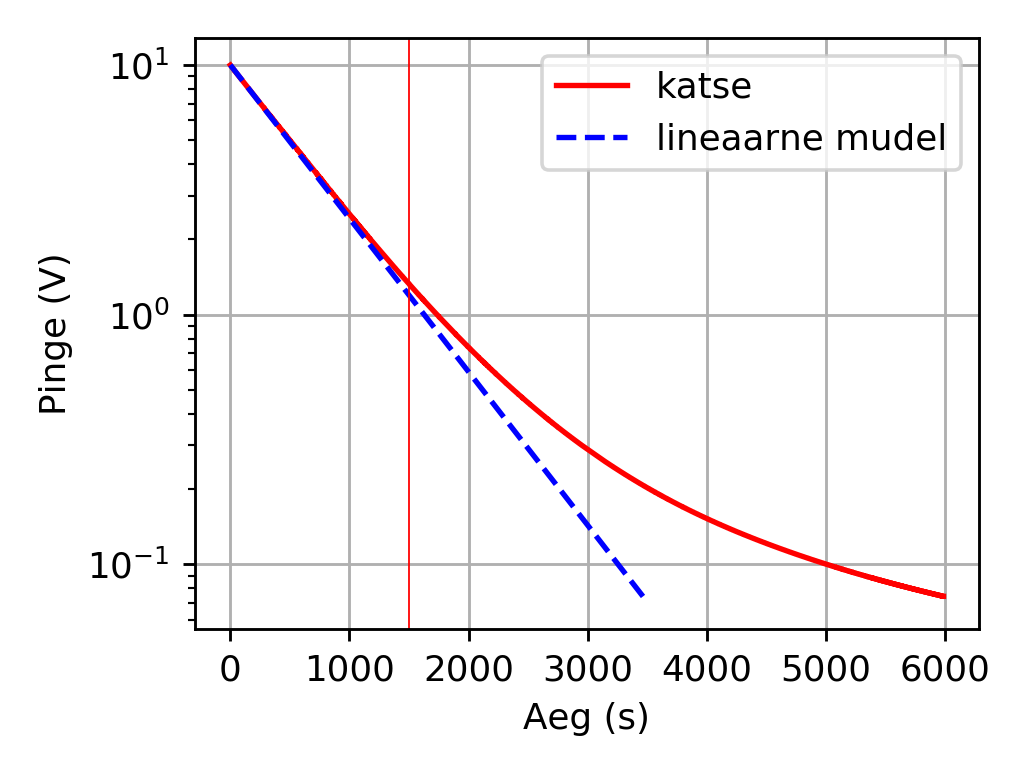

In [79]:
n = len(aeg) // 4
_, tõus, algordinaat = np.polyfit(aeg[:n], np.log(pinge[:n]), 2)
mahtuvus = -1 / (takistus * tõus)

print('Algmahtuvus %.3f F' % mahtuvus)

t = np.linspace(0, 3500, 100)
with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-', label='katse')
    plot(t, np.exp(tõus * t + algordinaat), 'b--', label='lineaarne mudel')
    yscale('log')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    axvline(aeg[n], color='red', lw=0.5)
    grid()
    legend()
    tight_layout()
    savefig(fail + '_mudel.png', bbox_inches='tight')
    display(fig)

### Laengu sõltuvus pingest

<img src="kondensaatori_pinge_laeng_skeem.png" style="height: 8em; float: right; margin-left: 1em;"/>Et täpsemalt karakteriseerida sellise kondensaatori omadusi, püüame mõõta kondensaatorisse kogunenud laengu sõltuvuse rakendatud pingest. Selleks laadime kondensaatorit läbi takisti, ja takistil tekkiva pingelangu järgi saame jälgida voolutugevuse muutumist. Voolutugevuse integreerimise teel saame hiljem arvutada ülekantud laengu. Toiteploki pinget tõstame 2&nbsp;V sammuga. Pärast toitepinge tõstmist ootame, kuni voolutugevus muutub piisavalt väikeseks. Seejuures me muidugi eeldame, et kondensaatori isetühjenemine (lekkevoolu tõttu) toimub oluliselt pikemates ajamastaapides ja seda võib ignoreerida.

In [ ]:
U_set = np.arange(2, 10.1, 2.0)
takistus = 20.5
andmed = []

with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            print('======= toitepinge = %5.2f V =======' % U)
            time.sleep(1)
            ajutine = []
            t0 = time.time()
            ps.pinge(U)
            mm.uus()
            while True:
                pinge = mm.lugem()
                aeg = time.time() - t0
                print('aeg = %5.1f s, pinge = %6.4f V' % (aeg, pinge))
                ajutine.append((aeg, pinge, pinge / takistus))
                if aeg > 1500 or (aeg > 100 and pinge < 0.002):
                    break
            andmed.append(np.array(ajutine))

```
======= toitepinge =  2.00 V =======
aeg =   0.0 s, pinge = -0.0001 V
aeg =   0.4 s, pinge = 1.9462 V
aeg =   1.0 s, pinge = 1.9009 V
aeg =   1.4 s, pinge = 1.8586 V
aeg =   1.9 s, pinge = 1.8179 V
aeg =   2.4 s, pinge = 1.7785 V
aeg =   3.0 s, pinge = 1.7402 V
aeg =   3.4 s, pinge = 1.7029 V
aeg =   3.9 s, pinge = 1.6665 V
...
======= toitepinge =  4.00 V =======
aeg =   0.0 s, pinge = 0.0020 V
aeg =   0.5 s, pinge = 1.9485 V
aeg =   1.0 s, pinge = 1.9049 V
aeg =   1.5 s, pinge = 1.8639 V
aeg =   1.9 s, pinge = 1.8243 V
aeg =   2.5 s, pinge = 1.7860 V
aeg =   3.0 s, pinge = 1.7487 V
aeg =   3.4 s, pinge = 1.7124 V
aeg =   4.0 s, pinge = 1.6770 V
...
======= toitepinge =  6.00 V =======
aeg =   0.0 s, pinge = 0.0026 V
aeg =   0.5 s, pinge = 1.9453 V
aeg =   1.1 s, pinge = 1.9044 V
aeg =   1.5 s, pinge = 1.8654 V
aeg =   2.0 s, pinge = 1.8279 V
aeg =   2.6 s, pinge = 1.7914 V
aeg =   3.0 s, pinge = 1.7560 V
aeg =   3.5 s, pinge = 1.7214 V
aeg =   4.0 s, pinge = 1.6877 V
...
======= toitepinge =  8.00 V =======
aeg =   0.0 s, pinge = 0.0045 V
aeg =   0.5 s, pinge = 1.9517 V
aeg =   0.9 s, pinge = 1.9123 V
aeg =   1.4 s, pinge = 1.8750 V
aeg =   1.9 s, pinge = 1.8391 V
aeg =   2.5 s, pinge = 1.8043 V
aeg =   3.0 s, pinge = 1.7704 V
aeg =   3.5 s, pinge = 1.7372 V
aeg =   4.0 s, pinge = 1.7049 V
...
======= toitepinge = 10.00 V =======
aeg =   0.0 s, pinge = 0.0059 V
aeg =   0.5 s, pinge = 1.9473 V
aeg =   1.1 s, pinge = 1.9101 V
aeg =   1.5 s, pinge = 1.8747 V
aeg =   2.0 s, pinge = 1.8403 V
aeg =   2.5 s, pinge = 1.8070 V
aeg =   3.0 s, pinge = 1.7745 V
aeg =   3.6 s, pinge = 1.7427 V
aeg =   4.0 s, pinge = 1.7118 V
```

Järjendis `andmed` on nüüd hulk erineva suurusega massiive, ja lisaks tuleks salvestada ka `U_set`. Ühte tekstifaili (`numpy.savetxt` abil) selliseid erineva suurusega massiive ei saa paigutada. Kuid `numpy.save` abil saab tervikuna binaarfaili salvestada mistahes massiivi sarnase objekti, mille elemendid võivad samuti olla massiivid.

<IPython.core.display.Javascript object>


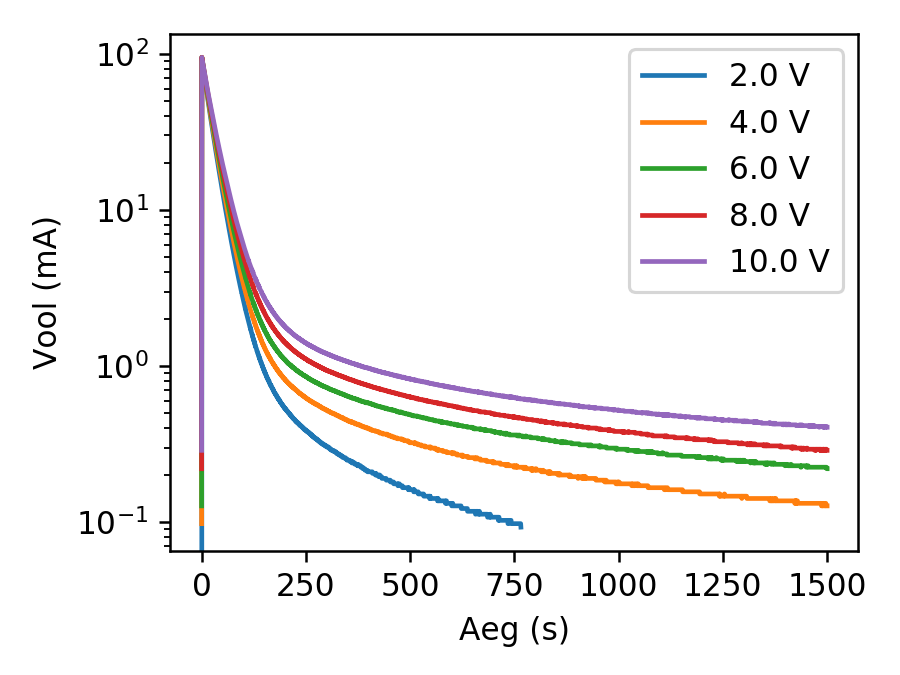

In [76]:
fail = 'kondensaatori_pinge_laeng'
np.save(fail, [U_set] + andmed, allow_pickle=True) # faili laiend .npy lisatakse automaatselt

with ioff():
    fig = figure()
    for U, seeria in zip(U_set, andmed):
        plot(seeria[:,0], 1000 * seeria[:,2], label='%.1f V' % U)
    xlabel('Aeg (s)')
    ylabel('Vool (mA)')
    yscale('log')
    legend()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

Andmete taastamine failist on analoogne:

In [63]:
andmed = np.load('kondensaatori_pinge_laeng.npy', allow_pickle=True)
U_set = andmed[0]
andmed = andmed[1:]

Kondensaatorisse kogunenud elektrilaengu saame jällegi integreerimise teel:

<IPython.core.display.Javascript object>


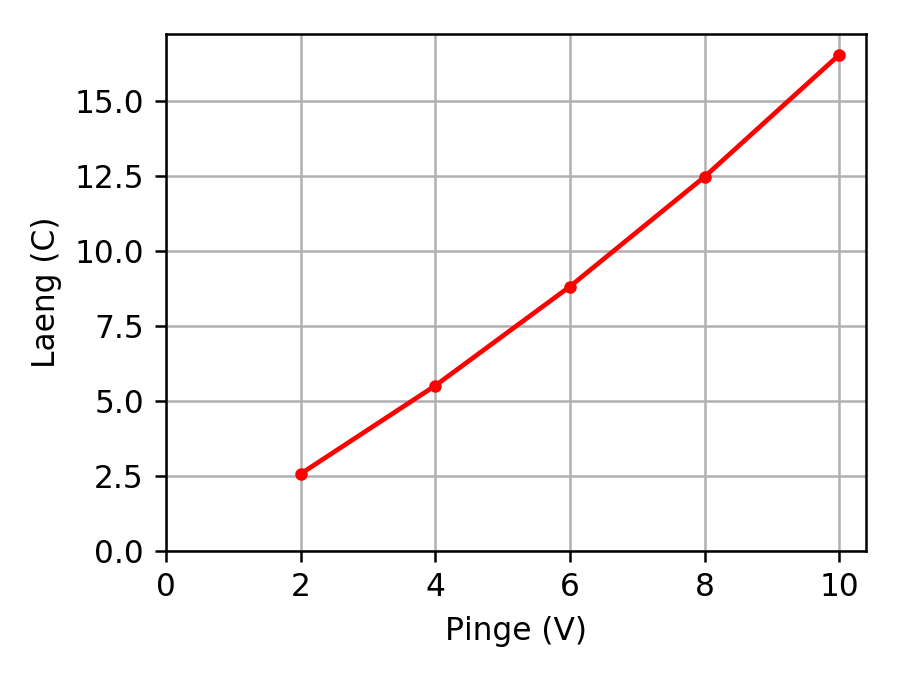

In [72]:
laeng = np.cumsum( [np.trapz(seeria[:,2], seeria[:,0]) for seeria in andmed] )

with ioff():
    fig = figure()
    plot(U_set, laeng, 'r.-')
    xlim(left=0)
    ylim(bottom=0)
    xlabel('Pinge (V)')
    ylabel('Laeng (C)')
    grid()
    tight_layout()
    display(fig)

Ootuspäraselt saadud sõltuvus ei ole päris lineaarne. Pigem tuleks lineaarsele liikmele lisada ka ruutliige: $Q=aU+bU^2$, kus $a$ annab mahtuvuse väikeste pingete juures.

Mahtuvus 1.189 F


<IPython.core.display.Javascript object>


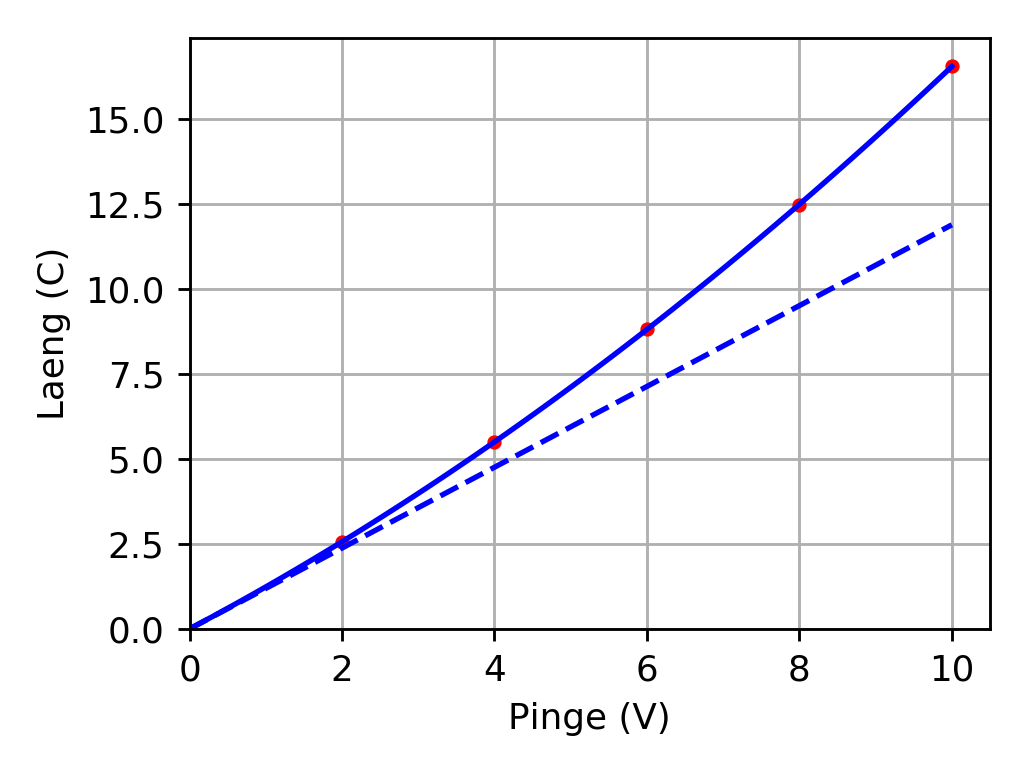

In [52]:
mudel = lambda U, a, b: a*U + b*U*U

a, b = 1, 0.02
(a, b), _ = curve_fit(mudel, U_set, laeng, (a, b))
print('Mahtuvus väikestel pingetel = %.3f F' % a)

U = np.linspace(0, 10, 100)
with ioff():
    fig = figure()
    plot(U_set, laeng, 'r.')
    plot(U, mudel(U, a, b), 'b-')
    plot(U, a*U, 'b--')
    xlim(left=0)
    ylim(bottom=0)
    xlabel('Pinge (V)')
    ylabel('Laeng (C)')
    grid()
    tight_layout()
    savefig(fail + '_mudel.png', bbox_inches='tight')
    display(fig)

Kuna $Q$ ja $U$ seos ei ole enam lineaarne, tuleb eristada integraalset mahtuvust $$\frac{Q}{U}=a+bU$$ ja diferentsiaalset mahtuvust $$\frac{dQ}{dU}=a+2bU.$$

<IPython.core.display.Javascript object>


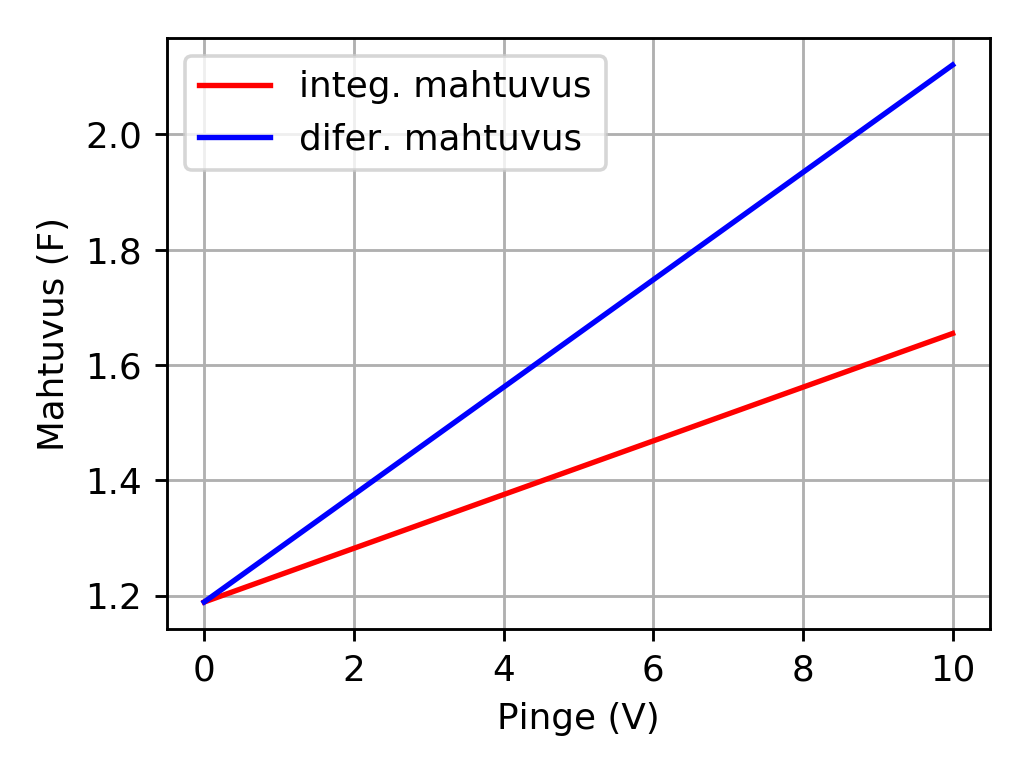

In [60]:
with ioff():
    fig = figure()
    plot(U, a + b * U, 'r-', label='integ. mahtuvus')
    plot(U, a + 2 * b * U, 'b-', label='difer. mahtuvus')
    xlabel('Pinge (V)')
    ylabel('Mahtuvus (F)')
    grid()
    legend()
    tight_layout()
    savefig(fail + '_mahtuvus.png', bbox_inches='tight')
    display(fig)

### Mäluefekt

<img src="kondensaatori_tühjenemine_mälu_skeem.png" style="height: 9em; float: right; margin-left: 1em;"/>Super- või elektrolüütkondensaatoreid ei ole võimalik lühikese ajaga täiesti tühjaks laadida. Selles veendumiseks teeme järgmise katse. Laeme kondensaatori eelnevalt teatud pingeni ja ootame mõninga aja kuni kondensaatori seisund on stabiliseerunud. Seejärel lülitame külge multimeetri, nagu näidatud joonisel, ja käivitame mõõtmise. Mõne aja pärast lühistame kondensaatori paariks sekundiks, kuni pinge kondensaatoril kukub nulli. Pärast lühise kõrvaldamist hakkab pinge taastuma.

In [ ]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    mm.uus()
        lugem = mm.lugem()
        aeg.append(time.time() - t0)
        pinge.append(lugem)
        print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
        if aeg[-1] > 6000:
            break

aeg = np.array(aeg)
pinge = np.array(pinge)

```
aeg =    0.4 s;  pinge = 2.1559 V
aeg =    0.8 s;  pinge = 2.1559 V
aeg =    1.4 s;  pinge = 2.1559 V
aeg =    1.8 s;  pinge = 2.1559 V
aeg =    2.3 s;  pinge = 2.1559 V
aeg =    2.9 s;  pinge = 2.1560 V
aeg =    3.4 s;  pinge = 2.1559 V
aeg =    3.8 s;  pinge = 2.1559 V
aeg =    4.4 s;  pinge = 2.1560 V
aeg =    4.9 s;  pinge = 2.1559 V
aeg =    5.3 s;  pinge = 2.1559 V
aeg =    5.9 s;  pinge = 2.1559 V
aeg =    6.4 s;  pinge = 2.1559 V
aeg =    6.8 s;  pinge = 2.1559 V
...
aeg = 5993.2 s;  pinge = 0.6143 V
aeg = 5993.7 s;  pinge = 0.6143 V
aeg = 5994.2 s;  pinge = 0.6143 V
aeg = 5994.8 s;  pinge = 0.6143 V
aeg = 5995.3 s;  pinge = 0.6144 V
aeg = 5995.8 s;  pinge = 0.6144 V
aeg = 5996.2 s;  pinge = 0.6144 V
aeg = 5996.7 s;  pinge = 0.6144 V
aeg = 5997.2 s;  pinge = 0.6145 V
aeg = 5997.7 s;  pinge = 0.6145 V
aeg = 5998.2 s;  pinge = 0.6145 V
aeg = 5998.7 s;  pinge = 0.6145 V
aeg = 5999.3 s;  pinge = 0.6145 V
aeg = 5999.8 s;  pinge = 0.6145 V
aeg = 6000.3 s;  pinge = 0.6145 V
```

<IPython.core.display.Javascript object>


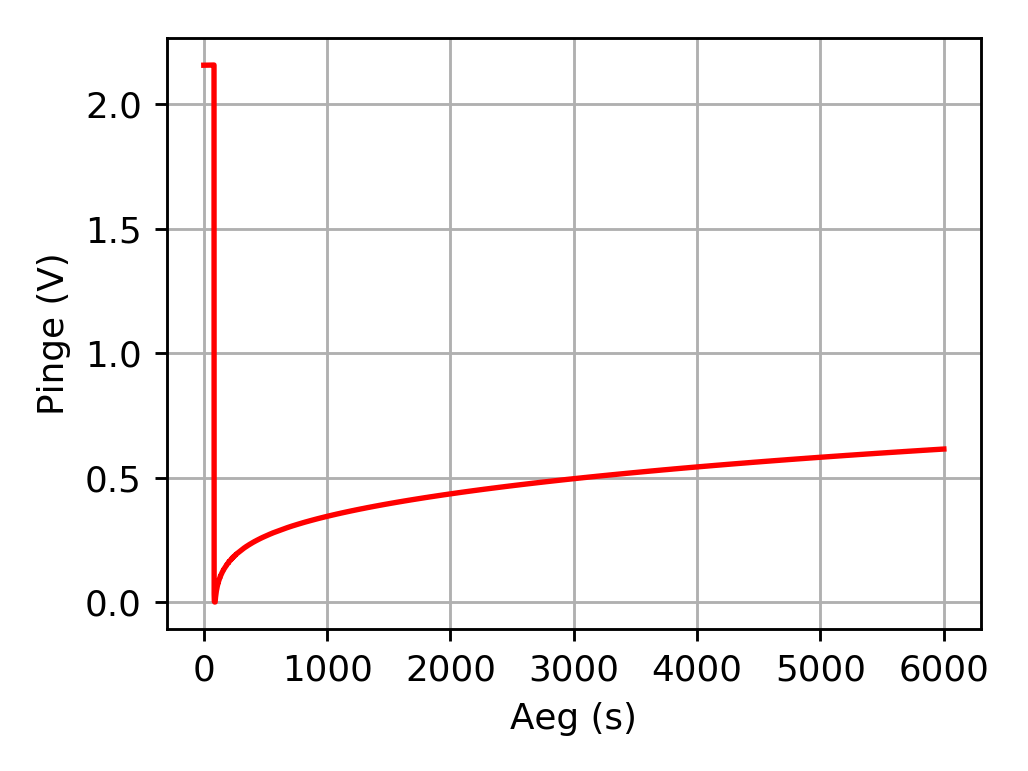

In [42]:
fail = 'kondensaatori_tühjenemine_mälu'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    grid()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)

Põhjalikuma katsetamisega võiks ka veenduda, et taastumisel pinge saavutab seda suurema väärtuse, mida kõrgema pingeni oli kondensaator algselt laetud.

<img src="kondensaatori_laadimine_mälu_skeem.png" style="height: 8em; float: right; margin-left: 1em;"/>Sama efekti võib näha ka kondensaatori äkilisel laadimisel. Ühendame algselt tühjaks laetud kondensaatori elektriskeemi, mis on näidatud joonisel. Seame toiteplokil pinge 2&nbsp;V ja voolutugevuse 0,4&nbsp;A ja käivitame mõõtmise. Mõne hetke pärast sulgeme lüliti. Pinge kondensaatoril hakkab kiiresti kasvama (tempoga $I/C$) kuni saavutab maksimumi 2&nbsp;V, seejärel voolutugevus hakkab kahanema. Sel hetkel avame lüliti.

In [ ]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    mm.uus()
    while True:
        lugem = mm.lugem()
        aeg.append(time.time() - t0)
        pinge.append(lugem)
        print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
        if aeg[-1] > 6000:
            break

aeg = np.array(aeg)
pinge = np.array(pinge)

```
aeg =    0.4 s;  pinge = 0.0014 V
aeg =    1.0 s;  pinge = 0.0014 V
aeg =    1.5 s;  pinge = 0.0014 V
aeg =    2.0 s;  pinge = 0.0014 V
aeg =    2.4 s;  pinge = 0.0015 V
aeg =    3.0 s;  pinge = 0.0015 V
aeg =    3.5 s;  pinge = 0.0015 V
aeg =    4.0 s;  pinge = 0.0015 V
aeg =    4.5 s;  pinge = 0.0015 V
aeg =    5.0 s;  pinge = 0.0015 V
aeg =    5.5 s;  pinge = 0.0015 V
aeg =    6.0 s;  pinge = 0.0015 V
aeg =    6.4 s;  pinge = 0.0015 V
...
aeg = 5993.9 s;  pinge = 1.6512 V
aeg = 5994.4 s;  pinge = 1.6512 V
aeg = 5994.9 s;  pinge = 1.6512 V
aeg = 5995.4 s;  pinge = 1.6512 V
aeg = 5996.0 s;  pinge = 1.6512 V
aeg = 5996.4 s;  pinge = 1.6512 V
aeg = 5996.9 s;  pinge = 1.6512 V
aeg = 5997.4 s;  pinge = 1.6512 V
aeg = 5997.9 s;  pinge = 1.6512 V
aeg = 5998.4 s;  pinge = 1.6512 V
aeg = 5998.9 s;  pinge = 1.6512 V
aeg = 5999.4 s;  pinge = 1.6512 V
aeg = 5999.9 s;  pinge = 1.6511 V
aeg = 6000.4 s;  pinge = 1.6511 V
```

<IPython.core.display.Javascript object>


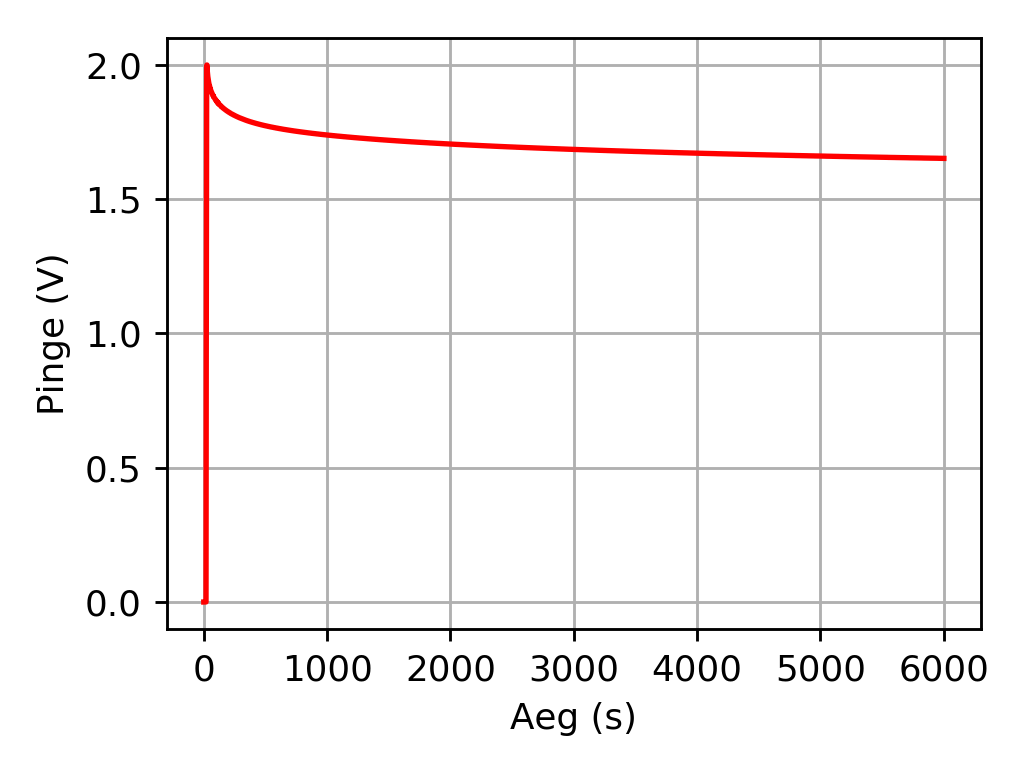

In [62]:
fail = 'kondensaatori_laadumine_mälu'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

with ioff():
    fig = figure()
    plot(aeg, pinge, 'r-')
    xlabel('Aeg (s)')
    ylabel('Pinge (V)')
    grid()
    tight_layout()
    savefig(fail + '.png', bbox_inches='tight')
    display(fig)